# 시계열 분석 (Time Series)

* 시간 ! : 특정 간격을 갖는 시간 (Lag)
    * Lag에서 Data의 Trend를 찾는다!
* 일변량 정상시계열
    * ARIMA
* Trend: 추세
* Seasonality: 계절성
* Cycle: 주기
* Noise: 잡음 -> White Noise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('Data11.csv') # 구매일 구매금액 물품대분류로 나뉜 데이터 - 803675개
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
df1.head() # 유아용품 판매 A사에 판매 데이터이다!

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


우리가 여기서 할 건 <b>구매금액</b>을 예측해 보는 것이다!<br>
이 데이터는 위에 head()를 통해 봤듯이 2018-04-20일부터 시작을 한다.<br>
tail()을 통해 확인해보면 2020-08-06일까지 데이터가 존재한다.<br>
물론 이렇게 확인하면 정렬이 안 된 데이터일 경우 위험할수도 있지만...<br>
그래서 가장 확실한 방법은 구매일을 DateTime으로 바꿔서 확인하는 것이 가장 적절하다.<br>

In [4]:
df1['Datetime'] = pd.to_datetime(df1['구매일']) #구매일 데이터(Object 타입)를 pandas의 datetime으로! 

In [5]:
df1['Datetime'].describe() #series 형태에도 당연히 describe 적용된다! 

count                           803675
mean     2019-10-17 10:16:51.462593536
min                2018-04-20 00:00:00
25%                2019-07-01 00:00:00
50%                2019-10-18 00:00:00
75%                2020-02-01 00:00:00
max                2020-08-07 00:00:00
Name: Datetime, dtype: object

시작일과 종료일을 제대로 확인할 수 있었다.<br>
일단 Datetime 타입으로 바꿨으니, 이걸 연도와 일자 요일별로 다 바꿔보자. -> 바꾸는데 dt 사용

In [6]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.dayofweek
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

In [7]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,4,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,4,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,4,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,4,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,6,Sunday


이제 트렌드를 파악해야 함. <br>
트렌드를 파악할 때 가장 간단한 건, 일자별로 구매 금액의 합을 확인하는 것!<br>
여기선 sns 라이브러리의 lineplot() 사용<br>

<Axes: xlabel='Datetime', ylabel='구매금액'>

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (

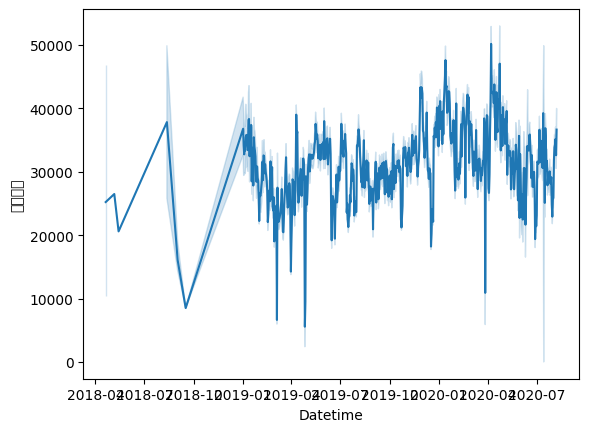

In [8]:
# lineplot은 matplotlib를 손쉽게 사용할 수 있게 하는 wrapper 
# 어쨌든 안쪽에선 matplotlib를 사용하고 있다.
# 
sns.lineplot(data=df1, x='Datetime', y='구매금액') # 이렇게 하면 estimator가 없어서 그냥 일자별 평균 나타남

<Axes: xlabel='Datetime', ylabel='구매금액'>

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (

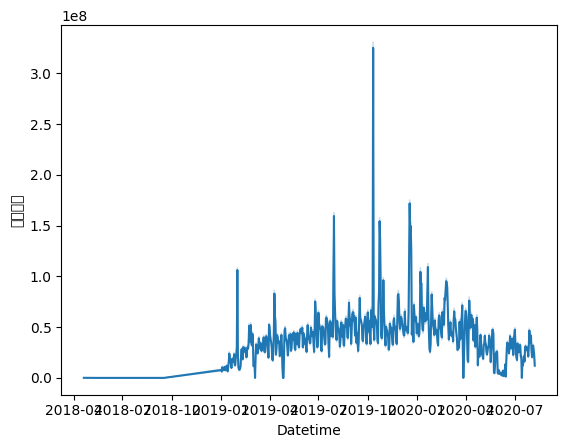

In [9]:
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum) #이렇게 하면 80만개라서 시간 오래 걸림 

In [10]:
# row index가 Datetime column index가 구매금액(합)이었는데, reset_index로 row_index도 데이터화 
# 이렇게 Pivoting을 해서 일별 합을 계산해버리기!
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index() #이렇게 하면 훨씬 빠름

<Axes: xlabel='Datetime', ylabel='구매금액'>

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (

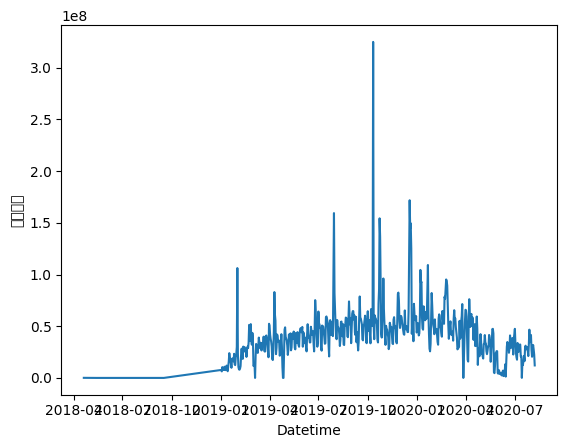

In [11]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [12]:
p2 = pd.pivot_table(data=df1, 
                    index=['Datetime', '물품대분류'], 
                    values='구매금액', 
                    aggfunc='sum').reset_index() #이렇게 하면 훨씬 빠름

<Axes: xlabel='Datetime', ylabel='구매금액'>

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) mi

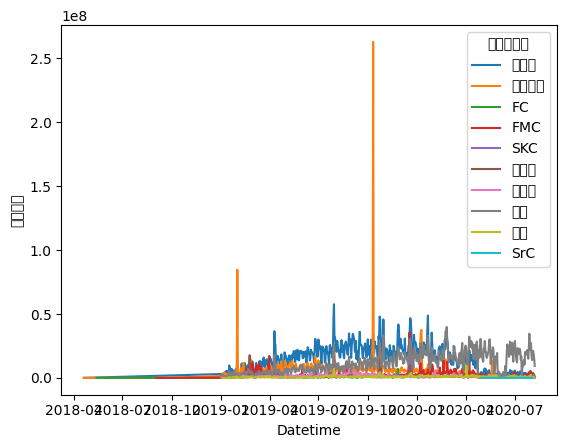

In [13]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

여기서 전체 물품에 대한 예측을 해도 괜찮고, 특정 물품만 뽑아서 예측을 해도 된다.
필자는 기저귀 제품만 뽑아서 트렌드를 예측해보겠다.
위에서도 보았듯이 저 툭 튀어나온 물품이 바로 더블하트인데 이런 것은 뒤에서 안좋은 예측을 일으키는 요인이 될 수 있다.
그래서 시계열 분석을 할 땐 먼저 시각화를 해보면서 이게 쉽게 분석할 수 있을지 확인을 해봐야 하는 것이다!

In [14]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:] # 이렇게 첫번째를 빼는 이유는 트렌드가 없어서...2019년도에 와서야 변화가 있다.
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,0,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,4,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,3,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,0,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,0,Monday


# ARIMA (Auto Regressive Integrated Moving Average Model)

* AR (Auto Regressive Model) : 자기 회귀 모델
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - 대표적인 예로 주식
    - ACF : 자기상관함수 / 특정 구간내 데이터간 상관관계를 표현
    - ACF만 사용하면 다른 시점의 데이터들이 현재 시점에 지속적으로 영향 줄 수 있다.
    - 예로 교회수 증가 -> 범죄율 증가 but(사이에 인구수 증가가 원인) : 이런 외부적 요인 때문에 두 변수가 상관관계가 있어보임
    - PACF : 위에 경우를 방지하기 위해 부분자기상관함수를 사용한다.(이전의 연속적인 연관성을 배제하고 두 변수간의 관계만 파악)
      
* MA (Moving Average Model) : 이동 평균 모델
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델
    - 특정 구간의 평균을 적용하면 불규칙적인 변동을 제거할 수 있다.
* Difference (차분)
    - 기본적으로 시계열 분석을 할 때 정상적인 자료들에만 적용 가능
    - 정성적의 의미는 시간의 변동에 있어서 평균이나 분산이 막 변동되지 않고 일정한 데이터들, 즉 일정한 데이터들을 의미
    - 하지만 실무에서는 당연히 이러면 제약이 생길 수 밖에 없다.(외부적 요인이 많음)
    - 그래서 차분은 정성성을 만족하지 못하는 데이터(주로 평균이 점점 감소/증가, 또는 분산 변화)에 대해 차분을 실시해서
    - 데이터를 정성적으로 변환시켜줌 
  
이 세가지 모델이 조합되어 만들어진 모델이 ARIMA

## ARIMA 모델 적용을 위한 조건들
* 단기 예측에 적합
* 계절적 변동 요인 (주기적 변동)이 있는 경우 사용
* Sample > 50
* 정성적 자료에 대해 분석 -> 차분

In [15]:
import statsmodels.tsa.api as tsa #ARIMA 모델 사용하는 라이브러리

In [16]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,0,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,4,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,3,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,0,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,0,Monday


In [17]:
#일별로 정리하기
#Datetime이 index로 잡혀있는 것이 제일 좋음!
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [18]:
#일주일 단위로 묶기 : 일주일 단위 평균 금액 계산
y = df_time['구매금액'].resample('1D').mean()

In [19]:
y.isnull().sum() # missing.value 확인

np.int64(7)

In [42]:
y2 = y.fillna(method='ffill')

/var/folders/k0/vk4qjwsj5t16r8_qc2jztf_m0000gn/T/ipykernel_1535/1171997284.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y2 = y.fillna(method='ffill')


여긴 없지만 만약 있다면
y.fillna(method='bfill') ffill -> 이전 일자 들어감 / bfill -> 뒤에 일자 들어감

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

/usr/local/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

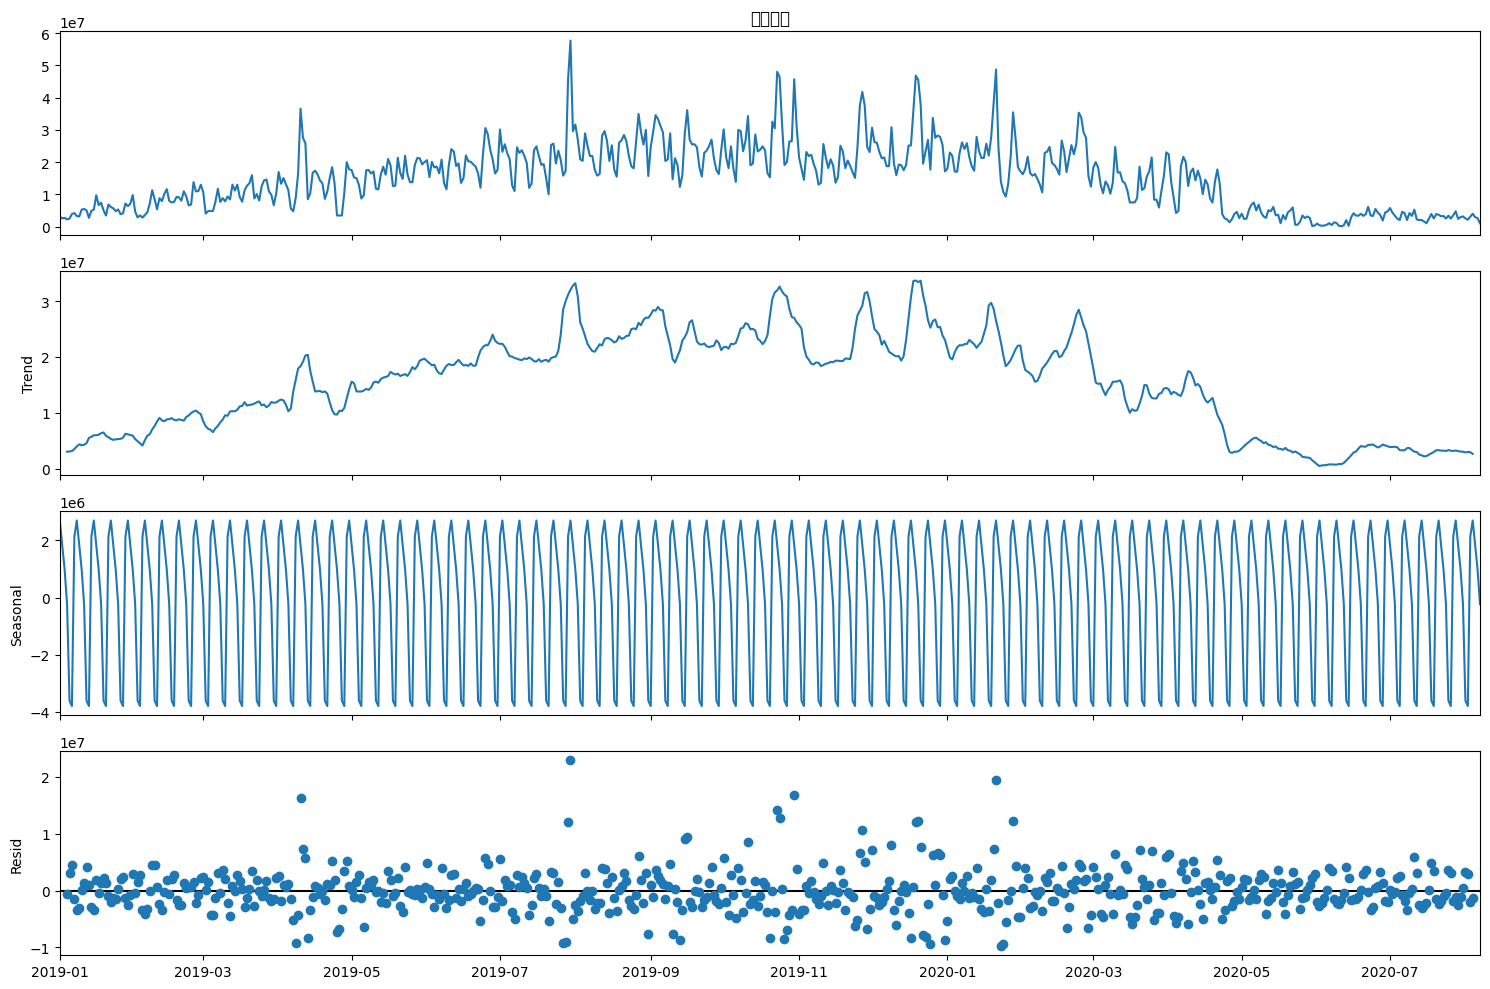

In [45]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y2, model='additive')

# 모델 시각화
flg = model_series.plot()
plt.show()

이러면 일자별로 판매 금액에 대한 시계열 분석이 나타난다!
seasonal_decompose는 시계열 분해라는 모델이다.
### 시계열 분해
우리가 시계열 데이터를 볼 때
- Trend 확인 (추세요인)
- Seasonality (계절요인)
- Cycle/Residual 확인 (불규칙 또는 순환 요인)

맨 처음 그래프는 진짜 일별로 구매금액 다 찍은 거, 이걸 트렌드로 나타낸 것이 두 번째 그래프
세 번째 그래프는 계절성을 본 것
마지막 그래프는 잔차 Residual을 본 것
이때 잔차는 평균점을 기준으로 얼마나 떨어져 있나를 보는 것이다.

이렇게 seasonal_decompose 함수를 써서 이게 ARIMA 모델에 적용 가능한지 먼저 보는 것이다.
그 다음에 ARIMA 모델을 이용!

In [46]:
import itertools # 반복수를 만드는 라이브러리 

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q)) #p는 AR에서 몇일전 자료가 영향을 주는지, d는 difference, q는 MA에서 차수
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [48]:
seasonal_pdq #12는 계절성 드러내기 위해!

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [49]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [50]:
# 위 리스트에 해당하는 ARIMA 모델을 주욱 만들었다!
# p,d,q의 조합이 모델에 대해 유의미 한지를 보는 것!
# 여기는 XARIMAX를 사용해서 4가지 전부(마지막 12까지) 보지만, ARIMA 모델은 3가지 밖에 안본다(pdq)
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81070D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.811D+01
  F =   18.106959300286004     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.7

 This problem is unconstrained.


 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65052D+01    |proj g|=  2.88434D-01

At iterate    5    f=  1.64931D+01    |proj g|=  1.48275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   8.821D-07   1.649D+01
  F =   16.493074768700570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70064D+01    |

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65802D+01    |proj g|=  5.99556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.996D-06   1.658D+01
  F =   16.580170444073588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.64824D+01    |proj g|=  5.45487D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   2.935D-07   1.648D+01
  F =   16.482411165458114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77545D+01    |proj g|=  1.14888D+00

At iterate    5    f=  1.77270D+01    |proj g|=  6.99170D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73710D+01    |proj g|=  1.00705D+00

At iterate    5    f=  1.72972D+01    |proj g|=  6.06533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   7.425D-06   1.730D+01
  F =   17.297110687738176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.62531D+01    |proj g|=  2.16858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.169D-05   1.625D+01
  F =   16.253144838627595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  1.73284D+01    |proj g|=  2.23675D-01

At iterate    5    f=  1.73082D+01    |proj g|=  8.09131D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   8.091D-06   1.731D+01
  F =   17.308177946275379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73021D+01    |proj g|=  1.01868D+00

At iterate    5    f=  1.72299D+01    |proj g|=  1.16983D-02

At iterate   10    f=  1.72295D+01    |proj g|=  3.96670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.669D-06   1.723D+01
  F =   17.229462934397031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.62517D+01    |proj g|=  1.32145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   4.655D-06   1.625D+01
  F =   16.251535502588276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68666D+01    |proj g|=  7.10570D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.106D-10   1.687D+01
  F =   16.866630979254030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64531D+01    |proj g|=  6.44533D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.445D-06   1.645D+01
  F =   16.453100176430535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.62422D+01    |proj g|=  2.88416D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   7.989D-06   1.624D+01
  F =   16.242124880064008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68375D+01    |proj g|=  2.67161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   9.379D-07   1.684D+01
  F =   16.837441549978493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63262D+01    |proj g|=  1.94519D-01

At iterate    5    f=  1.62757D+01    |proj g|=  1.04877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     25      1     0     0   2.114D-07   1.628D+01
  F =   16.275721321515899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65514D+01    |proj g|=  3.08706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   3.464D-05   1.655D+01
  F =   16.551363090621564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64716D+01    |proj g|=  3.85656D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   3.553D-08   1.647D+01
  F =   16.469222721747595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.



At iterate    5    f=  1.62738D+01    |proj g|=  3.45069D-02

At iterate   10    f=  1.62736D+01    |proj g|=  5.38401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   1.119D-06   1.627D+01
  F =   16.273644519330855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68836D+01    |proj g|=  5.79000D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62846D+01    |proj g|=  9.36441D-02

At iterate    5    f=  1.62680D+01    |proj g|=  1.46971D-02

At iterate   10    f=  1.62679D+01    |proj g|=  9.99556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   9.996D-06   1.627D+01
  F =   16.267906683359499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.65478D+01    |proj g|=  2.12133D-02

At iterate   10    f=  1.65462D+01    |proj g|=  1.06416D-01

At iterate   15    f=  1.65444D+01    |proj g|=  6.17106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   3.669D-05   1.654D+01
  F =   16.544359304300450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63606D+01    |proj g|=  4.27087D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   8.065D-07   1.636D+01
  F =   16.359029532830828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63067D+01    |proj g|=  1.24210D-01


 This problem is unconstrained.



At iterate    5    f=  1.62671D+01    |proj g|=  1.08795D-02

At iterate   10    f=  1.62667D+01    |proj g|=  3.45630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     22      1     0     0   2.904D-06   1.627D+01
  F =   16.266716394936680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68554D+01    |proj g|=  3.79542D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  1.67426D+01    |proj g|=  1.12306D-02

At iterate    5    f=  1.67425D+01    |proj g|=  2.02505D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   2.025D-06   1.674D+01
  F =   16.742514799437590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62285D+01    |proj g|=  6.85641D-02


 This problem is unconstrained.



At iterate    5    f=  1.62182D+01    |proj g|=  2.81377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   2.545D-05   1.622D+01
  F =   16.218151413431691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70057D+01    |proj g|=  9.57735D-01

At iterate    5    f=  1.65583D+01    |proj g|=  3.44307D-01

At iterate   10    f=  1.65432D+01    |proj g|=  9.28178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   5.948D-06   1.654D+01
  F =   16.543192316311913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.65195D+01    |proj g|=  2.87256D-02

At iterate   10    f=  1.65193D+01    |proj g|=  2.19747D-02

At iterate   15    f=  1.65169D+01    |proj g|=  3.24780D-02

At iterate   20    f=  1.65081D+01    |proj g|=  4.63129D-02

At iterate   25    f=  1.65078D+01    |proj g|=  4.40519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     35      1     0     0   3.289D-05   1.651D+01
  F =   16.507801395242279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.63148D+01    |proj g|=  2.60724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   3.447D-05   1.631D+01
  F =   16.314764509771855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62443D+01    |proj g|=  8.39035D-02


 This problem is unconstrained.



At iterate    5    f=  1.62173D+01    |proj g|=  9.25227D-03

At iterate   10    f=  1.62168D+01    |proj g|=  6.17284D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   6.173D-06   1.622D+01
  F =   16.216809325206167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68661D+01    |proj g|=  4.98694D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63544D+01    |proj g|=  1.94468D-01

At iterate    5    f=  1.63039D+01    |proj g|=  2.31526D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     43      1     0     0   4.497D-05   1.630D+01
  F =   16.303890662547815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65239D+01    |proj g|=  5.20156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.503D-07   1.644D+01
  F =   16.440663092511976     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63959D+01    |proj g|=  1.41392D-01

At iterate    5    f=  1.63019D+01    |proj g|=  4.68141D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     16      1     0     0   5.517D-05   1.630D+01
  F =   16.301844615438384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68184D+01    |proj g|=  2.60796D-01

At iterate    5    f=  1.67493D+01    |proj g|=  2.36449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   7.191D-05   1.675D+01
  F =   16.749292098876008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.68233D+01    |proj g|=  2.45439D-01

At iterate   10    f=  1.67794D+01    |proj g|=  7.19866D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     48      1     0     0   7.048D-04   1.678D+01
  F =   16.779385939321166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63246D+01    |proj g|=  1.94303D-01


 This problem is unconstrained.



At iterate    5    f=  1.62729D+01    |proj g|=  4.30346D-02

At iterate   10    f=  1.62702D+01    |proj g|=  3.68262D-01

At iterate   15    f=  1.62543D+01    |proj g|=  3.35491D-01

At iterate   20    f=  1.62427D+01    |proj g|=  2.03966D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     48      1     0     0   1.175D-05   1.624D+01
  F =   16.242707204624288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65048D+01    |proj g|=  2.57440D-01

At iterate    5    f=  1.64375D+01    |proj g|=  3.65790D-02

At iterate   10    f=  1.64373D+01    |proj g|=  1.66658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   1.667D-06   1.644D+01
  F =   16.437348842426552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


  ys=-1.241E-01  -gs= 4.577E-03 BFGS update SKIPPED

At iterate    5    f=  1.63706D+01    |proj g|=  4.60120D-02

At iterate   10    f=  1.63691D+01    |proj g|=  8.01847D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     45      1     1     0   8.018D-07   1.637D+01
  F =   16.369125489221585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63665D+01    |proj g|=  1.42125D-01

At iterate    5    f=  1.62703D+01    |proj g|=  3.02755D-02

At iterate   10    f=  1.62537D+01    |proj g|=  1.09270D-01

At iterate   15    f=  1.62417D+01    |proj g|=  5.18630D-02

At iterate   20    f=  1.62406D+01    |proj g|=  7.65032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     36      1     0     0   2.790D-06   1.624D+01
  F =   16.240574500865236     

CONVERG

In [51]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})

In [52]:
ARIMA_list.sort_values(by='AIC') # 베스트 파라미터 찾기! -> 가장 AIC 낮은거!

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910
23,"(0, 1, 0)","(1, 1, 1, 12)",19009.286110
63,"(1, 1, 1)","(1, 1, 1, 12)",19011.472166
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967429
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",20243.619505
12,"(0, 0, 1)","(1, 0, 0, 12)",20256.568197
1,"(0, 0, 0)","(0, 0, 1, 12)",20486.120636
8,"(0, 0, 1)","(0, 0, 0, 12)",20744.606738


## 그럼 대체 AIC가 뭐냐?
### Likelihood(최대우도)를 먼저 알아야...
    - 최대우도는 특정 데이터가 모수로부터 추출되었을 가능도 : 지금 얻은 데이터가 이 분포로부터 나왔을 확률!
    - 특정 값에 대한 분포의 확률추정이다. (연속확률밀도함수 pdf의 y값)
    - AIC가 이 최대우도를 바탕으로 계산

### AIC(Akaike information Criterion) : 데이터에 대한 모델의 상대적 품질을 수치화
    - AIC = -2 ln(L) + 2k        L->최대우도함수
    - 값이 낮을 수록 모형 적합도가 높은 것을 의미한다!

In [55]:
# 베스트 파라미터로 다시 모델 돌리기
mod = tsa.statespace.SARIMAX(y2,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62285D+01    |proj g|=  6.85641D-02

At iterate    5    f=  1.62182D+01    |proj g|=  2.81377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   2.545D-05   1.622D+01
  F =   16.218151413431691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                           

결과 서머리에 ln(L), AIC 말고도 BIC, HQIC라고 하는 값도 보인다.
이녀석들도 이 모델이 얼마나 잘 데이터를 대변하냐, 즉 품질을 결정하는 지표중에 하나이다.
## BIC(Bayes Information Criterion)
    - BIC = -2ln(L) + log(n)p
    - 변수가 더 많은 경우, AIC보다 더 많은 페널티를 부여해 계산 -> 변수가 더 많을수록 AIC보다 크다.

## HQIC(Hannan Quinn Information Criterion)
    - HQIC = -2ln(L) + 2kln(ln(n))

# SARIMAX Results 해석
Seasonal ARIMA Model -> trend 여부에 대해 ARIMA 모델을 생성하고, 계절성에 대해서도 ARIMA 모델을 추가적으로 수행
Order (p, d, q), Seasonal Order (P, D, Q, M)
    - p : AR에서 p값 (p 구간내 데이터 사이의 상관관계)
    - d : 차분
    - q : MA에서 PACF 편상관계수 q 값
    - P : 계절성 주기에서 P 구간 내 데이터 상관관계 (앞에 것과 같은 대신 계절성이 붙는다!)
    - D : 계절성 여부가 있냐 (1 or 0)
    - Q : 계절성이 얼마나 반복되는지 그 횟수
    - M : 계절성 주기가 어떻게 되냐 (주기의 값)

Covariance Type에 있는 coef는 각각의 ARIMA 모델 안에 있는 회귀계수를 의미한다.
그리고 여기서의 P 값은 0.05값보다 낮으면 회귀계수 값들이 의미가 있는 것!
z는 P를 계산하기 위한 신뢰구간
그리고 그 아래에는 여러 통계지표가 있다.
Ljung-Box 검정은 일정 기간동안 관측치가 랜덤이고 독립적인지 여부를 검정(테스트)
    - 여기서 테스트라고 하는 것은 통계적 가설 검정을 의미
    - 통계적 가설 검정에는 두 가지 케이스가 있다
    - 귀무가설: 데이터가 상관관계를 나타내지 않는다.
    - 대립가설: 데이터가 상관관계를 나타낸다!
    - P.value(귀무가설이 참일 확률) < 0.05(유의수준-통계적 가설 검정의 기준 지금은 5%) -> 대립가설이 참
    - 지금 Q에 대한 P 값(Prob)이 0.05보다 크므로 귀무가설이 참이다.
Jarque-Bera Test는 왜도(정규분포 그렸을 때 얼마나 쏠려있냐)와 첨도(정규분포를 그렸을 때 얼마나 뾰족하냐)가 정규분포와 일치하는지 가설검정->결국 뭘 확인하려고 하냐...SARIMAX 이 계절성 아리마 모델에서 residual 이 잔차가 정규분포를 그리는가를 확인
    - 귀무가설: 해당 잔차(residual)은 정규분포와 일치한다
    - 대립가설: 해당 잔차(residual)은 정규분포와 일치하지 않는다.
    - P.value < 0.05, 해당 잔차는 정규분포를 띄지 않는다.
    - 이런 회귀모델에서 residual이라고 부르는 잔차가 정규분포를 띄지 않는다는 의미는 회귀계수로 설명 불가능한 트렌드가 
      숨겨져 있다는 것을 의미한다!
그 밑에 Skew와 Kurtosis는 왜도와 첨도를 의미!

Heteroskedasticity (H)는 이분산검정을 의미 : 이 모델에서 잔차의 분산이 같으냐 다르냐

## 잔차(오차)
ARIMA 모델에 의한 예측값과 실제값의 차이 -> 잔차(residual)